## Import required libraries and dependancies

In [2]:
## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

## For Visualization
import matplotlib.pyplot as plt

## For Visualization too
import seaborn as sns

## Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

## For preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## For missing values
from sklearn.impute import SimpleImputer

## Getting the recall score on our train set
from sklearn.metrics import recall_score

## Getting the accuracy score on train set
from sklearn.metrics import accuracy_score

## Getting the classification report from our train set
from sklearn.metrics import classification_report

## Cross validation
from sklearn.model_selection import cross_val_score
## Gridsearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from IPython.display import HTML,display

import warnings
warnings.filterwarnings("ignore")

## Some important functions

In [3]:
## printing the shape and head
def head(df,shape_only=False):
    print(df.shape)

    if shape_only:
        return
    else:
        return df.head()

## for EDA of categorical values
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j] 
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()

## Function that plots numerical variables into histogram and violin plot
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sns.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sns.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()
    
    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


## print text to see the font
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()

## Import data

In [4]:
path='C:\\Users\\91772\\DemoProjects\\CardioVascular\\'
data=pd.read_csv(path+'CVD_cleaned.csv')
head(data)

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## EDA

### Univariate 

In [5]:
import pandas_profiling as pp
profile = pp.ProfileReport(data)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Bivariate

In [6]:
import sweetviz
report=sweetviz.analyze([data,'Train'],target_feat='Heart_Disease')
report.show_html('Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### categorical and numerical variables

In [7]:
Target=pd.DataFrame()
Target=data['Heart_Disease'] #Target_variable
X=data['Heart_Disease']   
data.drop(columns={'Heart_Disease'},axis=1,inplace=True)
cat_var=data.select_dtypes(include='object')
num_var=data.select_dtypes(exclude='object')
# num_var1=num_var.columns.to_list()
# cat_var1=cat_var.columns.to_list()
# cols=data1.columns.to_list()

### Muticollinearity-- VIF

In [8]:
columns=['Weight_(kg)','Height_(cm)']
data.drop(columns=columns,axis=1,inplace=True)
num_var.drop(columns=columns,axis=1,inplace=True)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = num_var.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num_var.values, i)
                          for i in range(len(num_var.columns))]
vif_data

,feature,VIF
0,BMI,3.237544
1,Alcohol_Consumption,1.345132
2,Fruit_Consumption,2.473787
3,Green_Vegetables_Consumption,2.133052
4,FriedPotato_Consumption,1.528777


## Skewness

In [10]:
num_var1=num_var.columns.to_list()
def skew_def(x):
    if x> -0.5 and x< 0.5:
        return 'Normally distributed'
    if x> -0.1 and x<-0.5:
        return 'slightly negative skewed'
    if x< -0.1:
        return 'extremely negative skewed'
    if x > 0.5 and x< 1:
        return 'slightly positive skewed'
    else:
        return 'extremely positive skewed'
report=pd.DataFrame()
report['skew']=data[num_var1].skew()
report['skew_flag']=report['skew'].apply(lambda x: skew_def(x))
report

,skew,skew_flag
BMI,1.376619,extremely positive skewed
Alcohol_Consumption,1.885622,extremely positive skewed
Fruit_Consumption,1.248428,extremely positive skewed
Green_Vegetables_Consumption,2.415608,extremely positive skewed
FriedPotato_Consumption,4.912350,extremely positive skewed


In [14]:
import seaborn as sns
for i in num_var1:
    # Plotting a histogram with KDE
    sns.histplot(data[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution visuals')
    plt.show()
    plt.boxplot(data[i],vert=0) # show plot
    print('Outliers visualization for',i)
    plt.show()
    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

Outliers visualization for BMI
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Outliers visualization for Alcohol_Consumption
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Outliers visualization for Fruit_Consumption
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Outliers visualization for Green_Vegetables_Consumption
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Outliers visualization for FriedPotato_Consumption
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [13]:
data_copy=data.copy()

## Preprocessing

In [15]:
X=X.map({'No':0,'Yes':1})
X.value_counts(normalize=True)       #imbalance dataset

0    0.91915
1    0.08085
Name: Heart_Disease, dtype: float64

In [16]:
data1=pd.concat([data,Target],axis=1)
data1['Heart_Disease']=data1['Heart_Disease'].map({'No':0,'Yes':1})

In [17]:
data1.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0,0
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0,1
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0,0
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0,1
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0,0


In [18]:
num_var1=num_var.columns.to_list()
cat_var1=cat_var.columns.to_list()
cols=data1.columns.to_list()

## Feature selection using WoE and IV

In [19]:
import pandas as pd
import numpy as np

def data_vars(df, target):
    lst = []
    cols = df.columns

    for var in cols:
        if var != target:
            data = data1[[General_Health, Heart_Disease]].copy()
            data['Variable'] = var
            data = data.groupby(['Variable', var, target]).size().unstack().fillna(0)
            data['% of Total'] = data.sum(axis=1) / data.sum().sum()
            data['% of Good'] = data[0] / data[0].sum()
            data['% of Bad'] = data[1] / data[1].sum()
            data['WoE'] = np.log(data['% of Good'] / data['% of Bad'])
            data['IV'] = (data['% of Good'] - data['% of Bad']) * data['WoE']
            data = data.replace([np.inf, -np.inf], 0)
            data['IV'] = data['IV'].sum()
            lst.append(data['IV'].values[0])

    iv_df = pd.DataFrame({'Variable': cols.drop(target), 'IV': lst})
    iv_df = iv_df.sort_values('IV', ascending=False).reset_index(drop=True)
    return iv_df

In [20]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
        newDF['Predictive_power']=np.where(newDF['IV']<0.02,'Useless',
                                           np.where(newDF['IV']<0.1,'Weak',
                                                    np.where(newDF['IV']<0.3,'Medium',
                                                             np.where(newDF['IV']<0.5,'Strong','Too good to be true'
                                          ))))


        #Show WOE Table
        if show_woe == True:
            display(HTML(d.to_html()))
            print('information value of'+ivars+'is='+str(round(d['IV'].sum(),6)))
    display(HTML(newDF.to_html()))
    return newDF, woeDF

In [21]:
cols.remove('Heart_Disease')
iv,woe=iv_woe(data=data1[cols+['Heart_Disease']],target='Heart_Disease',bins=10,show_woe=False)

,Variable,IV,Predictive_power
0,General_Health,0.700840,Too good to be true
0,Checkup,0.164133,Medium
0,Exercise,0.108323,Medium
0,Skin_Cancer,0.084866,Weak
0,Other_Cancer,0.087424,Weak
0,Depression,0.013317,Useless
0,Diabetes,0.324345,Strong
0,Arthritis,0.292621,Medium
0,Sex,0.071645,Weak
0,Age_Category,0.997017,Too good to be true


## Encoding

In [22]:
for var in cat_var1:
    frequency = data1[var].value_counts(normalize=True)        #frequency encoding
    data1[var] = data1[var].map(frequency)

In [23]:
data1.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0.036687,0.120487,0.224938,0.902886,0.903262,0.799578,0.839040,0.327245,0.518679,0.100705,14.54,0.405577,0.0,30.0,16.0,12.0,0
1,0.357434,0.775030,0.224938,0.902886,0.903262,0.799578,0.130065,0.672755,0.518679,0.100705,28.29,0.594423,0.0,30.0,0.0,4.0,1
2,0.357434,0.775030,0.775062,0.902886,0.903262,0.799578,0.130065,0.672755,0.518679,0.104962,33.47,0.594423,4.0,12.0,3.0,16.0,0
3,0.036687,0.775030,0.775062,0.902886,0.903262,0.799578,0.130065,0.672755,0.481321,0.067038,28.73,0.594423,0.0,30.0,30.0,8.0,1
4,0.308767,0.775030,0.224938,0.902886,0.903262,0.799578,0.839040,0.672755,0.481321,0.072109,24.37,0.405577,0.0,8.0,4.0,0.0,0


## Modelling

In [24]:
# sample 5% of data to be used as unseen data
data = data1.sample(frac=0.95, random_state=786)
data_unseen = data1.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (293411, 17)
Unseen Data For Predictions: (15443, 17)


In [25]:
from pycaret.classification import *
# Initialize the PyCaret classification setup
clf = setup(data1, target='Heart_Disease')

# # Compare and select the best model
# best_model = compare_models()

# # Tune the hyperparameters of the chosen model
# tuned_model = tune_model(best_model)

# # Evaluate the model on holdout data
# evaluate_model(tuned_model)

# # Make predictions on new data
# predictions = predict_model(tuned_model, data=new_data)

,Description,Value
0,Session id,6404
1,Target,Heart_Disease
2,Target type,Binary
3,Original data shape,"(308854, 17)"
4,Transformed data shape,"(308854, 17)"
5,Transformed train set shape,"(216197, 17)"
6,Transformed test set shape,"(92657, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [26]:
# Initializing the setup (This step prepares the data for modeling)
exp = setup(data1, target='Heart_Disease', session_id=42, fix_imbalance=True)

,Description,Value
0,Session id,42
1,Target,Heart_Disease
2,Target type,Binary
3,Original data shape,"(308854, 17)"
4,Transformed data shape,"(490091, 17)"
5,Transformed train set shape,"(397434, 17)"
6,Transformed test set shape,"(92657, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9194,0.8345,0.0370,0.5192,0.0691,0.0590,0.1223,3.0070
dummy,Dummy Classifier,0.9191,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4380
gbc,Gradient Boosting Classifier,0.9172,0.8176,0.0785,0.4333,0.1329,0.1108,0.1576,82.4620
rf,Random Forest Classifier,0.9170,0.7958,0.0509,0.3973,0.0901,0.0731,0.1186,31.3710
et,Extra Trees Classifier,0.9123,0.7781,0.0797,0.3260,0.1280,0.0994,0.1277,51.3200
ada,Ada Boost Classifier,0.9104,0.7984,0.1558,0.3729,0.2190,0.1800,0.1998,12.6780
dt,Decision Tree Classifier,0.8606,0.5724,0.2287,0.1934,0.2095,0.1337,0.1342,1.4030
svm,SVM - Linear Kernel,0.7505,0.0000,0.6002,0.1942,0.2854,0.1867,0.2325,5.7130
ridge,Ridge Classifier,0.7179,0.0000,0.6949,0.1792,0.2849,0.1794,0.2437,0.4290
lda,Linear Discriminant Analysis,0.7177,0.7770,0.6953,0.1791,0.2848,0.1793,0.2437,1.1410


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [28]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [29]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9191,0.8311,0.0383,0.5000,0.0712,0.0604,0.1214
1,0.9195,0.8353,0.0435,0.5278,0.0803,0.0689,0.1342
2,0.9193,0.8267,0.0406,0.5108,0.0753,0.0641,0.1269
3,0.9198,0.8434,0.0338,0.5728,0.0637,0.0552,0.1249
4,0.9198,0.8328,0.0400,0.5512,0.0747,0.0644,0.1326
5,0.9185,0.8271,0.0309,0.4426,0.0578,0.0477,0.1000
6,0.9201,0.8346,0.0406,0.5820,0.0759,0.0661,0.1385
7,0.9199,0.8382,0.0423,0.5606,0.0787,0.0681,0.1379
8,0.9193,0.8345,0.0349,0.5169,0.0654,0.0557,0.1185


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
tuned_lightgbm=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9193,0.8291,0.0418,0.5105,0.0772,0.0658,0.1286
1,0.9202,0.8347,0.0423,0.5920,0.0790,0.0690,0.1430
2,0.9197,0.8268,0.0418,0.5448,0.0776,0.0668,0.1344
3,0.9197,0.8430,0.0349,0.5495,0.0656,0.0565,0.1235
4,0.9193,0.8329,0.0366,0.5161,0.0684,0.0583,0.1213
5,0.9182,0.8262,0.0320,0.4211,0.0595,0.0487,0.0982
6,0.9199,0.8341,0.0429,0.5639,0.0797,0.0691,0.1394
7,0.9198,0.8375,0.0441,0.5540,0.0816,0.0705,0.1396
8,0.9191,0.8340,0.0326,0.4957,0.0612,0.0517,0.1113


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


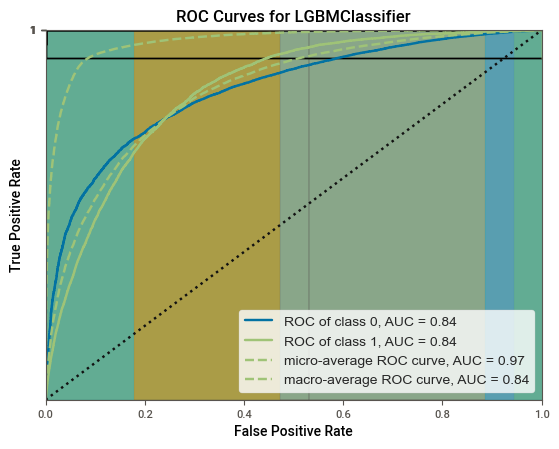

In [31]:
print(tuned_lightgbm)
plot_model(lightgbm, plot = 'auc')

In [32]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
predict_model(lightgbm);          #on unseen data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9196,0.8380,0.0386,0.5432,0.0720,0.0620,0.1289


In [34]:
# finalize rf model
final_lightgbm = finalize_model(lightgbm)
# print final model parameters
print(final_lightgbm)

Pipeline(memory=FastMemory(location=C:\Users\91772\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['General_Health', 'Checkup',
                                             'Exercise', 'Skin_Cancer',
                                             'Other_Cancer', 'Depression',
                                             'Diabetes', 'Arthritis', 'Sex',
                                             'Age_Category', 'BMI',
                                             'Smoking_History',
                                             'Alcohol_Consumption',
                                             'Fruit_Consumption',
                                             'Green_Vegeta...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_

In [35]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9198,0.8434,0.0406,0.5578,0.0757,0.0654,0.1346


In [36]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9170,0.8381,0.0484,0.6000,0.0896,0.0779,0.1536


,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease,prediction_label,prediction_score
0,0.115945,0.775030,0.224938,0.902886,0.903262,0.200422,0.83904,0.672755,0.518679,0.108252,27.459999,0.405577,0.0,12.0,12.0,4.0,0,0,0.7956
1,0.115945,0.775030,0.224938,0.902886,0.096738,0.200422,0.83904,0.672755,0.518679,0.108252,27.780001,0.405577,0.0,16.0,4.0,3.0,0,0,0.7963
2,0.308767,0.043454,0.775062,0.902886,0.903262,0.200422,0.83904,0.327245,0.518679,0.067890,28.190001,0.405577,17.0,3.0,0.0,1.0,0,0,0.9657
3,0.357434,0.775030,0.775062,0.902886,0.096738,0.799578,0.83904,0.327245,0.518679,0.072109,24.799999,0.594423,0.0,16.0,0.0,1.0,0,0,0.8684
4,0.357434,0.775030,0.775062,0.902886,0.903262,0.799578,0.83904,0.672755,0.518679,0.090833,31.889999,0.594423,0.0,16.0,8.0,4.0,0,0,0.9829
